# Deep compressed sensing on spectroscopic profiling data using variational auto-encoder

# Compressed sensing Theory

## Conventional CS

Sampling
$$ xs = \Phi x ,\quad for \quad \Phi_{k*N}, k > （4 * non-sparsity） $$

Sparsity hypothesis
$$ x = \Psi z $$

Compressed Sensing
$$ x_s = \Phi \Psi z $$

Optimization (LASSO)
$$ minimize \quad  ||z||_1 $$
$$ s.t \quad     x_s = \Phi \Psi z $$

Reconstruction
$$ x = \Psi z $$

-----------

## VAE-CS

The function `vae_reconstruct()` solves the problem $$\operatorname{argmin}_z \|ΦG(z)-x_s\|^2  $$


where:  
* G(z) is the decoder, acting like Ψ. i.e., G(z) = xr and Ψz = xr
* $x \in \mathbb R^n$ is the input signal.  
* $Φ$ is an $m\times n$ matrix with i.i.d $\mathcal N(0,\frac 1m)$ entries. Φ is the sensing matrix.  
* $\eta \in \mathbb R^m$ is a random Gaussian noise with i.i.d $\mathcal N(0,\frac{0.1}{\sqrt m})$ entries.
* $x_s = Φx$ is the measurement vector.

We follow the same exact procedure as in the paper: sample $10$ random initial $z$'s and solve the problem for each initialization using Adam optimizer with learning rate $0.01$. Gradients are computed automatically using Pytorch's `autograd` library. We return the $z$ that yields lowest measurement error at the end.

Adding `requires_grad_(False)` on all the variables except `z` ensures that only `z` is being optimized on.


## Two flavors of the sensing matrix $Φ$

#### random binary sensing matrix vs. random Gaussian sensing matrix

" A sensing matrix maps input vector to measurement vector through linear wighted summation of input. What makes a specefic matrix good, is application dependent. Now, both distributions more or less satisfy RIP. However hardware implementation of the Bernoulli matrix (binary or bipolar) is much much easier especially in analog domain. A Bernoulli wight is either 0 or 1 (or -1/1 in case of polar Bernoulli), but a Gaussian wight is a floating point figure. Multiplication of a flouting point number either in digital or analog, is resource consuming, while multiplication of a Bernoulli wight is feasible through implementation of a simple switch in analog domain or and instruction in digital. "

--------

In [1]:
import cs1
cs1.__version__

'0.2.5'

# Hyper-parameters

## VAE Model Topology hparams: 

    batch_size: Used to create pytorch `DataLoader` objects. affact the training process.  
    h_dim1 : hidden layer 1 nodes  
    h_dim2 : hidden layer 2 nodes. set 0 if don't use this layer.    
    z_dim : the latent variable layer dimensionality  

These affect the model complexity / topology.  

## CS Sensing hparams

    k : sampling percentage  
    PHI_flavor : 'gaussian' or 'bernoulli'  

## CS Reconstruction hparams: 

    lr : learning rate  
    regularization : regularization  
    iterations : gradient descent iterations  
    N : how many runs to construct each signal  
    add_noise : whether add white noise [reduce overfiting risk]

These are reconstruction hyper-parameters



# Construct and train VAE models. 

load dataset from vintage_7344_Y5Y26.csv
X.shape (121, 2089)  y.shape (121,)


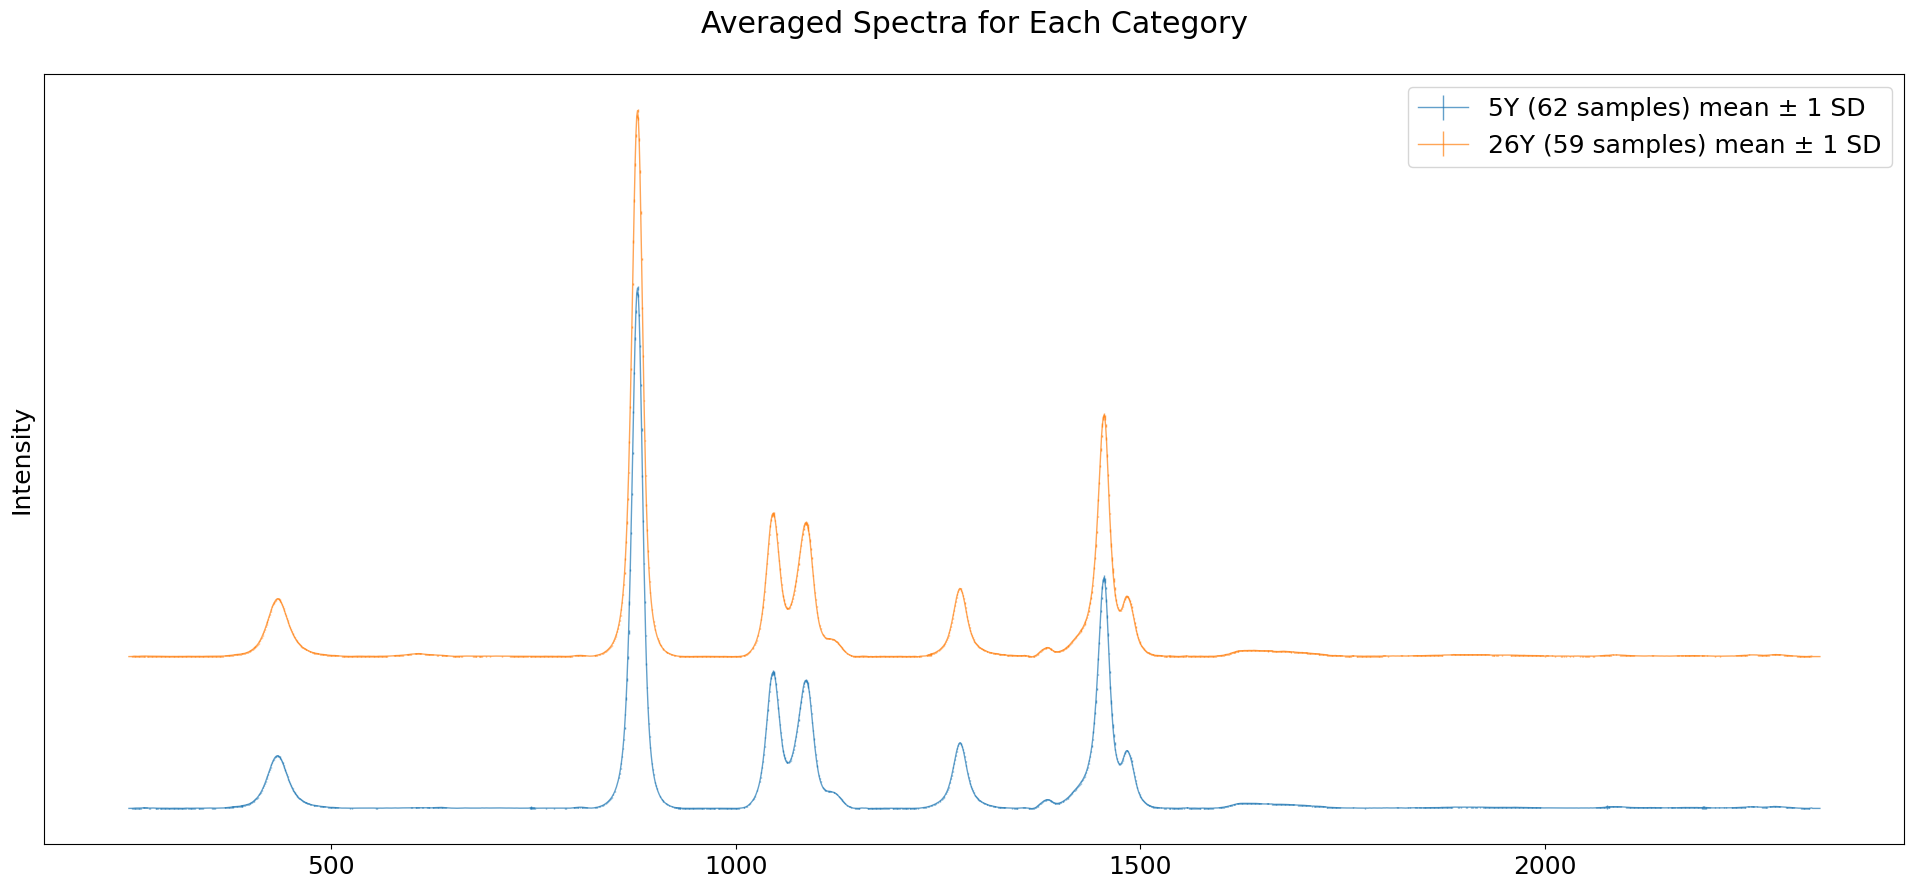

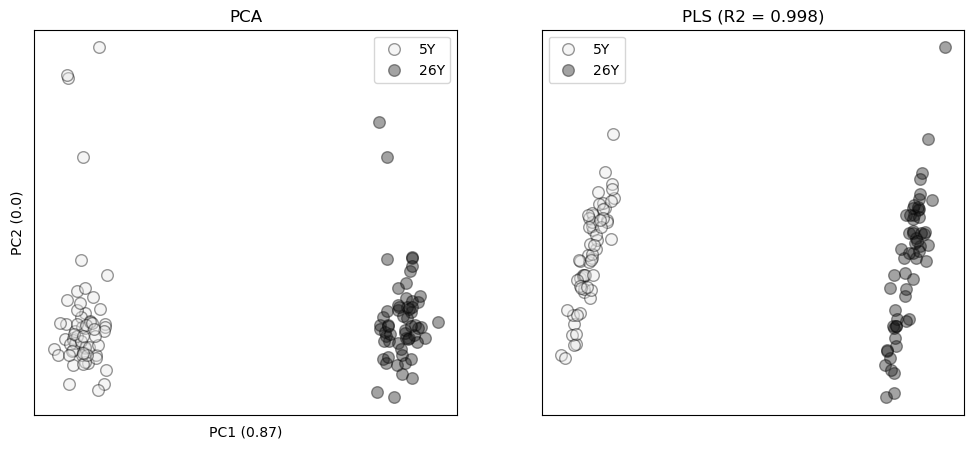

7344_Y5Y26.csv - Raman spectroscopic profiling dataset of 
5-year and 26-year Gujing Tribute vintage liquors. 

With a long history, Gujing Tribute Liquor with fragrant taste is one of the eight most famous liquors in China. In 196AD, Cao Cao presented the "Jiuyun Spring Liquor" that was produced in his hometown as the royal liquor, as well as its brewing methods to the Emperor Xian of Han Dynasty. During the Wan Li Reign of Ming Dynasty, it was presented to the royal court as a "tribute" all the way until Qing Dynasty, hence the liquor is named "Gujing Tribute Liquor" . On the basis of traditional processes, it has scientific recipes and technological innovations. It features "crystal clear, sweet and mellow like orchid, velvety and lasting after tasting" and brings a unique taste known for its sweetness, aroma and full flavor. It was awarded the gold medal of the national liquor-tasting conference for four times, and won the title of "National Famous Liquor". In March 2003, it was in

LogisticRegressionCV score on entire dataset: 1.0
Train Epoch: 1 [0/96 (0%)]	Loss: 130.042725
====> Epoch: 1 Training set loss: 126.9301
====> Validation set loss: 121.2950
Train Epoch: 2 [0/96 (0%)]	Loss: 122.446884
====> Epoch: 2 Training set loss: 118.6788
====> Validation set loss: 115.6123
Train Epoch: 3 [0/96 (0%)]	Loss: 112.395996
====> Epoch: 3 Training set loss: 112.3649
====> Validation set loss: 111.1519
Train Epoch: 4 [0/96 (0%)]	Loss: 110.641289
====> Epoch: 4 Training set loss: 108.3875
====> Validation set loss: 108.1410
Train Epoch: 5 [0/96 (0%)]	Loss: 108.505745
====> Epoch: 5 Training set loss: 105.7588
====> Validation set loss: 106.5500
Train Epoch: 6 [0/96 (0%)]	Loss: 102.380104
====> Epoch: 6 Training set loss: 102.6192
====> Validation set loss: 105.0586
Train Epoch: 7 [0/96 (0%)]	Loss: 100.222092
====> Epoch: 7 Training set loss: 100.4088
====> Validation set loss: 102.7440
Train Epoch: 8 [0/96 (0%)]	Loss: 95.215225
====> Epoch: 8 Training set loss: 95.6040
====

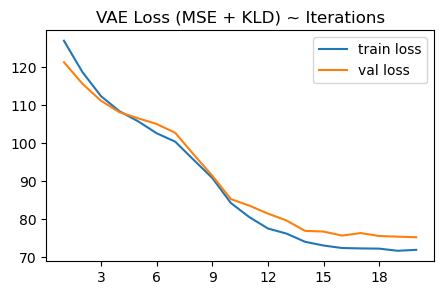

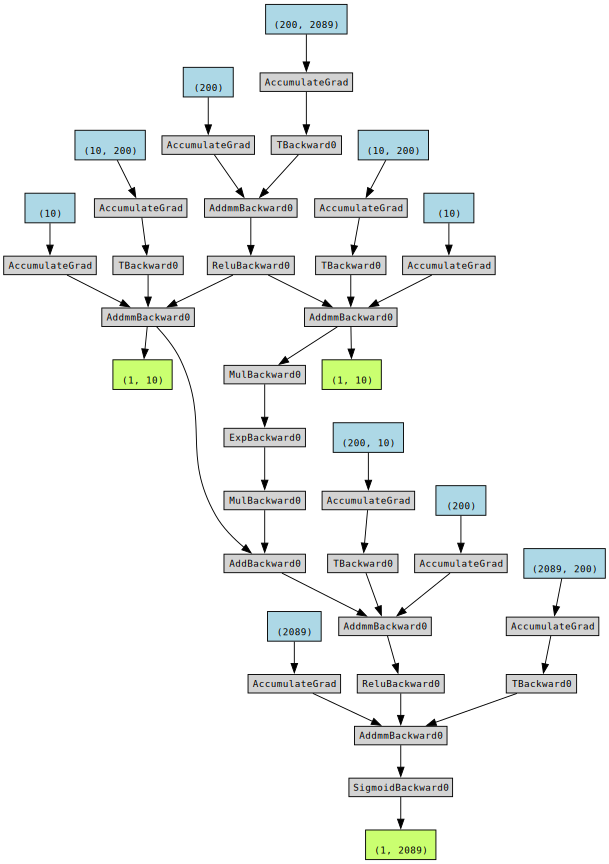

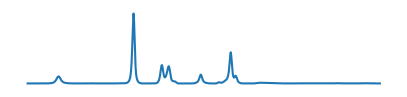

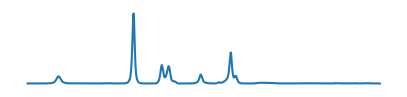

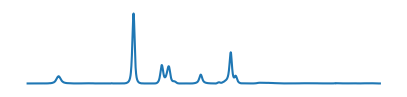

In [2]:
from cs1.basis.adaptive import vae
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

X, y, scaler, clf, model = vae.build_vae()

In [3]:
# To reload the model from pth

from cs1.basis.adaptive import vae
import torch

model = vae.torchVAE(x_dim=2089, h_dim1=200, h_dim2=0, z_dim=10)
model.load_state_dict(torch.load("vintage_vae_[200, 0, 10].pth"))
model.to('cuda') # load to GPU

# print model structure
for layer in model.named_modules():
    print(layer)

('', torchVAE(
  (fc1): Linear(in_features=2089, out_features=200, bias=True)
  (fc31): Linear(in_features=200, out_features=10, bias=True)
  (fc32): Linear(in_features=200, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=200, bias=True)
  (fc6): Linear(in_features=200, out_features=2089, bias=True)
))
('fc1', Linear(in_features=2089, out_features=200, bias=True))
('fc31', Linear(in_features=200, out_features=10, bias=True))
('fc32', Linear(in_features=200, out_features=10, bias=True))
('fc4', Linear(in_features=10, out_features=200, bias=True))
('fc6', Linear(in_features=200, out_features=2089, bias=True))


---

# VAE Training Curve

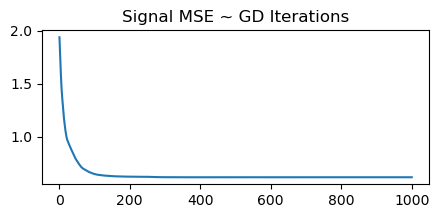

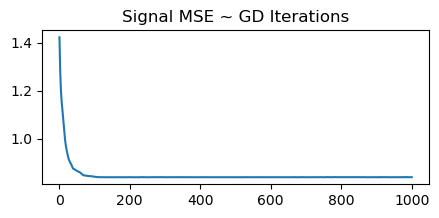

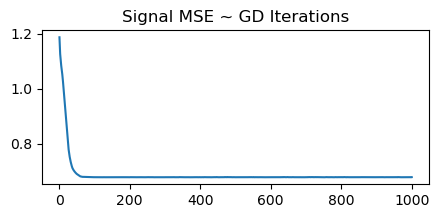

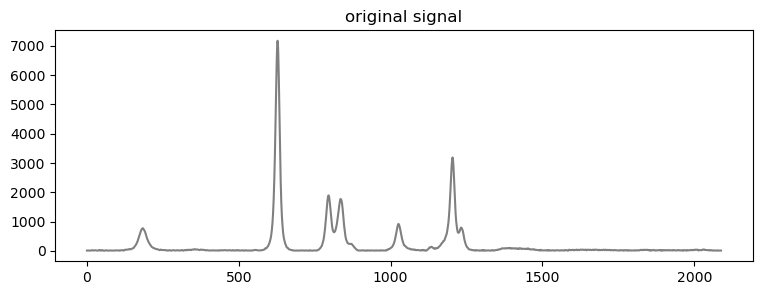

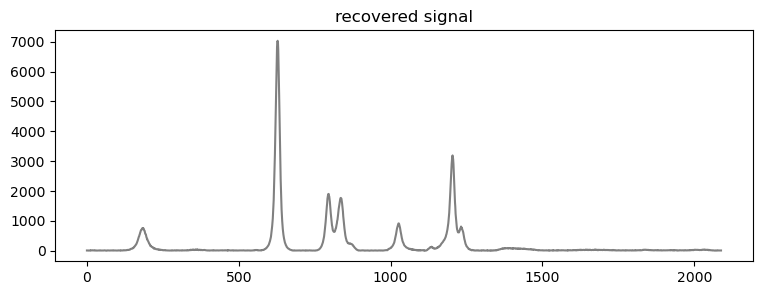

In [4]:
vae.VAE_Sensing_n_Recovery(model, X[0], scaler = scaler, k = 0.01,
                            PHI_flavor = 'bernoulli',  # or gaussian
                            lr = .1, 
                            iterations = 1000, N = 3, debug_mode = True)

For signal reconstruction, 100 iterations at 0.1 learning rate is enough.

In [5]:
dic, best_hparams, best_acc, sorted_dic = vae.vae_cs_grid_search(model, X, y,
ks = [0.01, 0.02],  
PHI_flavors = ['bernoulli', 'gaussian'], 
add_noises = [False, True],
lrs = [0.1],
iterationss = [100],
Ns = [3])

LogisticRegressionCV score on entire dataset: 1.0

Grid Search Loop: 0.01 bernoulli False 0.1 100 3


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [02:03<00:00,  1.02s/it]


Acc: 1.0
Acc improved from 0 to 1.0. Update best hparams : (0.01, 'bernoulli', False, 0.1, 100, 3)

Grid Search Loop: 0.01 bernoulli True 0.1 100 3


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [02:02<00:00,  1.02s/it]


Acc: 0.9917355371900827

Grid Search Loop: 0.01 gaussian False 0.1 100 3


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [02:02<00:00,  1.02s/it]


Acc: 0.9669421487603306

Grid Search Loop: 0.01 gaussian True 0.1 100 3


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [02:04<00:00,  1.03s/it]


Acc: 1.0

Grid Search Loop: 0.02 bernoulli False 0.1 100 3


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [02:02<00:00,  1.01s/it]


Acc: 1.0

Grid Search Loop: 0.02 bernoulli True 0.1 100 3


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [04:04<00:00,  2.02s/it]


Acc: 1.0

Grid Search Loop: 0.02 gaussian False 0.1 100 3


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [06:20<00:00,  3.14s/it]


Acc: 1.0

Grid Search Loop: 0.02 gaussian True 0.1 100 3


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [02:55<00:00,  1.45s/it]

Acc: 1.0


# Conclusion

The best hparam is (0.02, 'bernoulli', True). Reached 100% ACC. 

(0.01, 'bernoulli', False) is the second, gets 99.2% ACC.

# Compare with non-adaptive CS bases

BP solves the problem $$\operatorname{argmin_z} \|z\|_1 \quad s.t. \; \; Az=xs$$
$A = \Phi \Psi $ is the measurement matrix.  

----


The function `bp_cs()` defined below takes as input an signal vector `x`, generates `A` and the measurement `xs`, and reconstructs the signal using `bp_reconstruct()`. 

The basis pursuit minimization is a convex optimization problem that can be reformulated as a linear programming problem.

##  `cs.GridSearch_Dataset_Sensing_n_Recovery()`

load dataset from vintage_7344_Y5Y26.csv
X.shape (121, 2089)  y.shape (121,)
7344_Y5Y26.csv - Raman spectroscopic profiling dataset of 
5-year and 26-year Gujing Tribute vintage liquors. 

With a long history, Gujing Tribute Liquor with fragrant taste is one of the eight most famous liquors in China. In 196AD, Cao Cao presented the "Jiuyun Spring Liquor" that was produced in his hometown as the royal liquor, as well as its brewing methods to the Emperor Xian of Han Dynasty. During the Wan Li Reign of Ming Dynasty, it was presented to the royal court as a "tribute" all the way until Qing Dynasty, hence the liquor is named "Gujing Tribute Liquor" . On the basis of traditional processes, it has scientific recipes and technological innovations. It features "crystal clear, sweet and mellow like orchid, velvety and lasting after tasting" and brings a unique taste known for its sweetness, aroma and full flavor. It was awarded the gold medal of the national liquor-tasting conference for four t

100%|███████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 109.57it/s]


ACC =  0.512396694214876
Update best hparams. Acc improved from 0 to 0.512396694214876


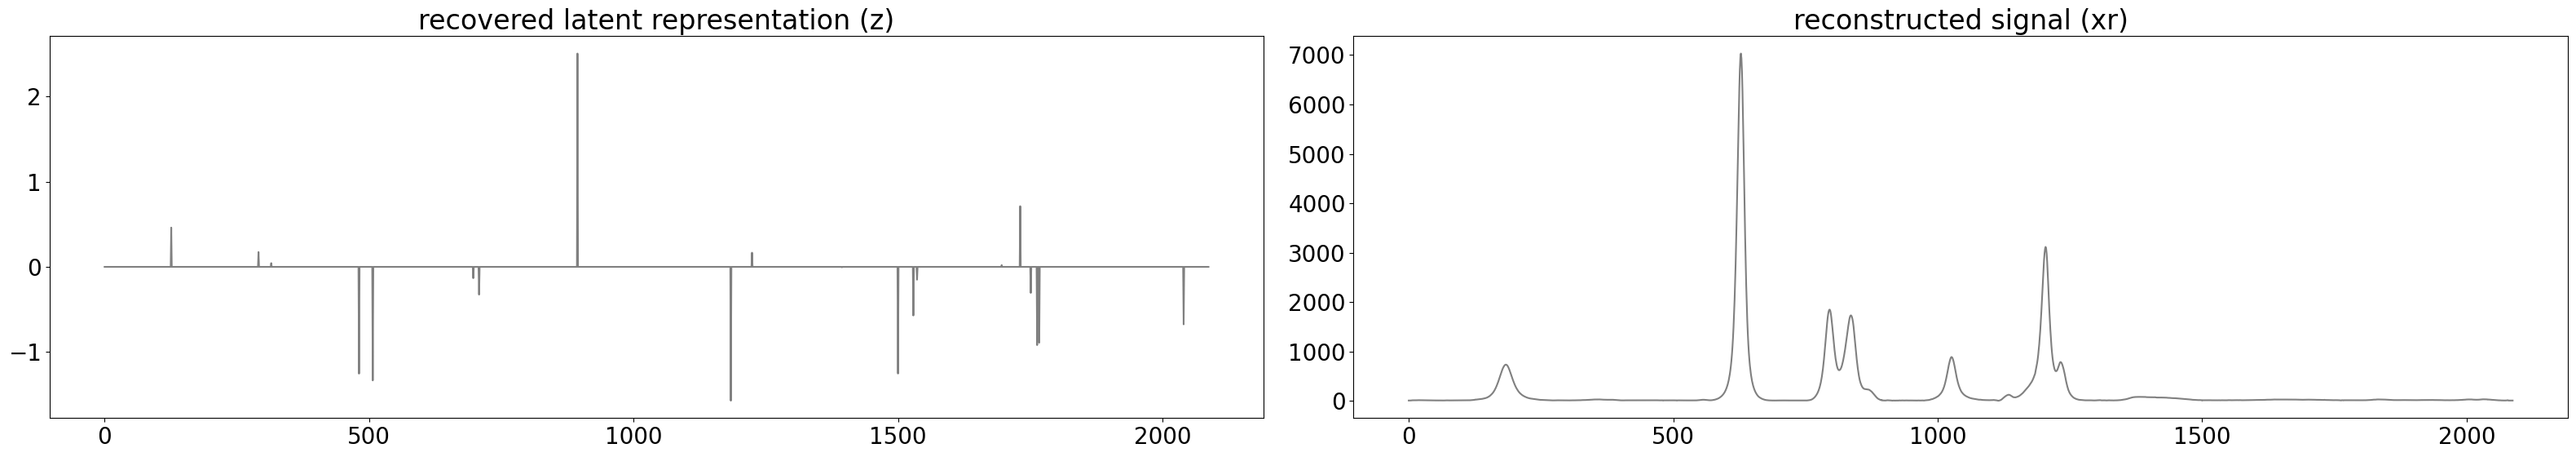


hyper-parameters:  (0.01, 'IDM', 'LASSO', 1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:12<00:00,  9.78it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.01, 'IDM', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:12<00:00, 10.00it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.01, 'IDM', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 71.38it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.01, 'IDM', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:03<00:00, 33.31it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.01, 'DCT', 'LASSO', 0.1)


100%|███████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 593.39it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.01, 'DCT', 'LASSO', 1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:29<00:00,  4.14it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.01, 'DCT', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:32<00:00,  3.72it/s]


ACC =  0.5206611570247934
Update best hparams. Acc improved from 0.512396694214876 to 0.5206611570247934


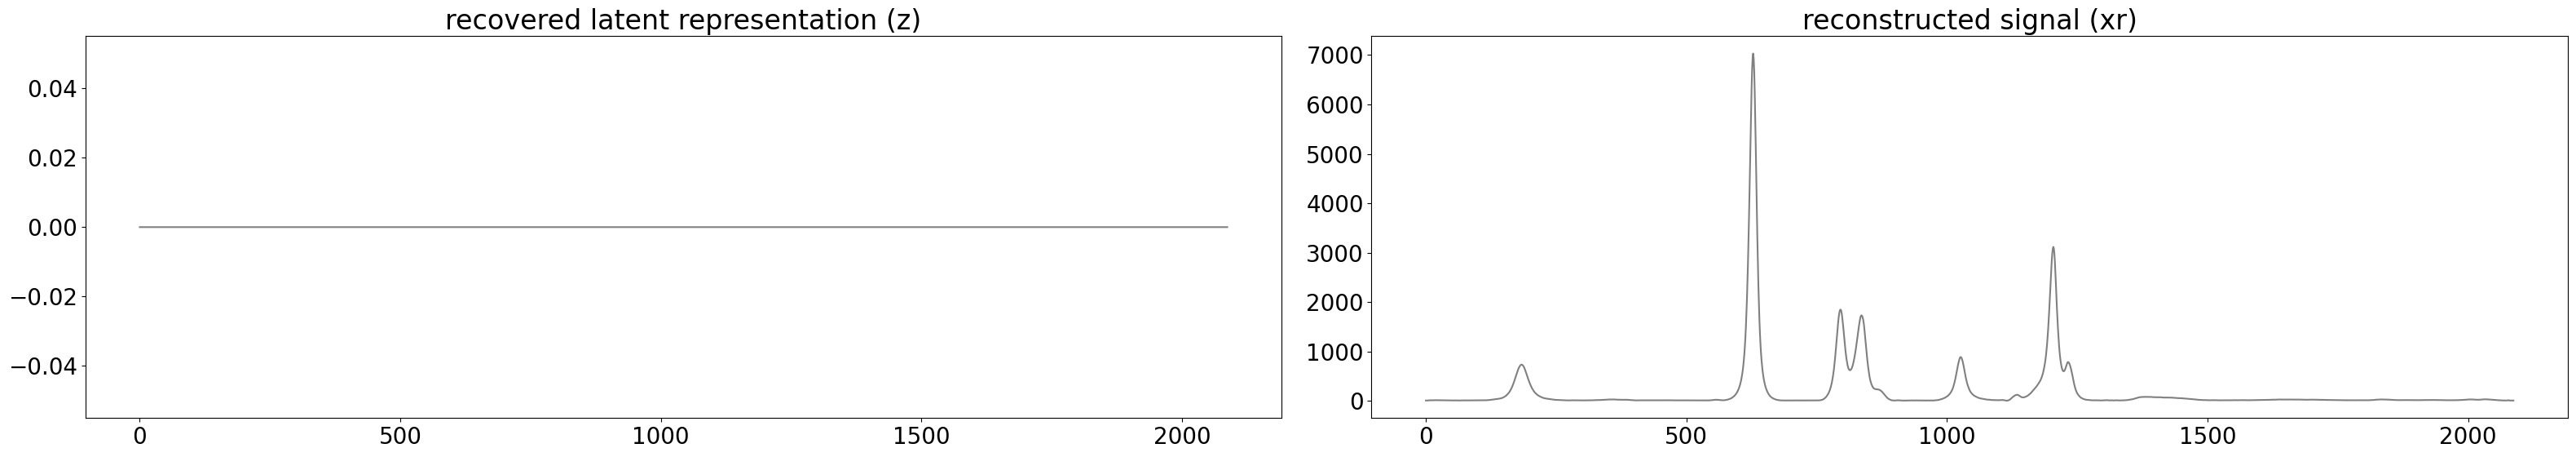


hyper-parameters:  (0.01, 'DCT', 'OMP', 0)


100%|███████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 154.14it/s]


ACC =  0.5206611570247934

hyper-parameters:  (0.01, 'DCT', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:10<00:00, 11.78it/s]


ACC =  0.5371900826446281
Update best hparams. Acc improved from 0.5206611570247934 to 0.5371900826446281


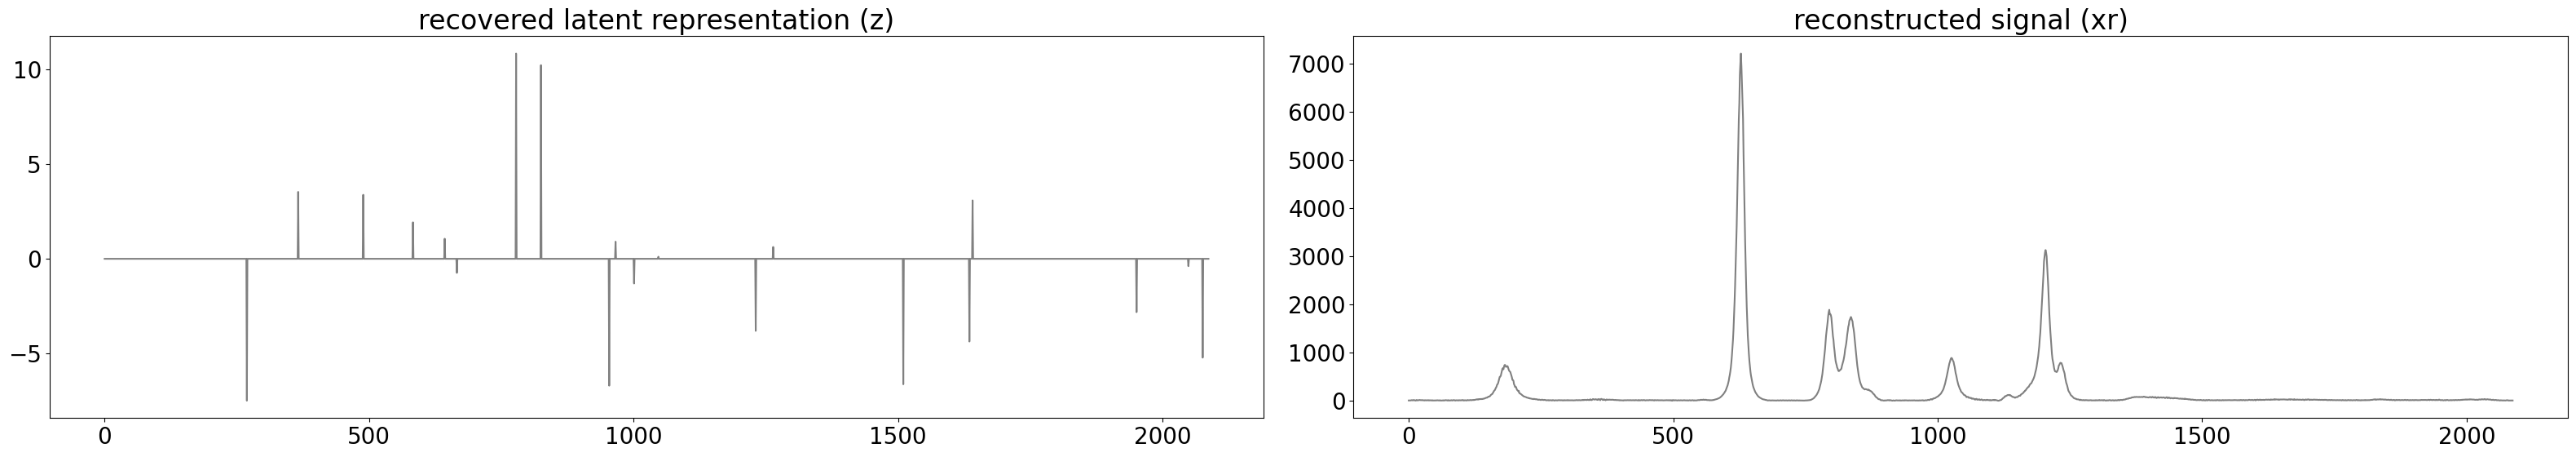


hyper-parameters:  (0.01, 'DFT', 'LASSO', 0.1)


100%|███████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 134.41it/s]


ACC =  0.5619834710743802
Update best hparams. Acc improved from 0.5371900826446281 to 0.5619834710743802


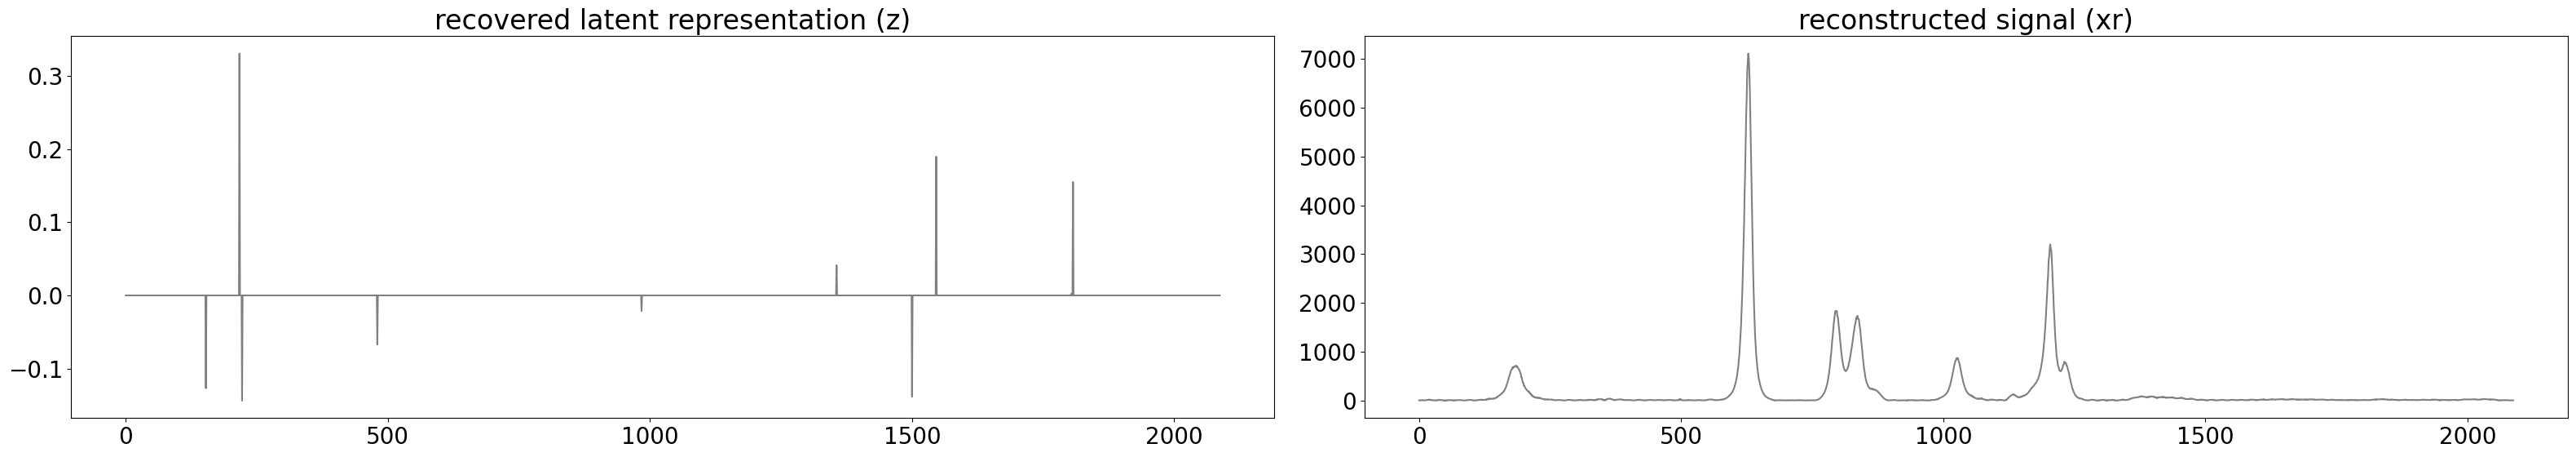


hyper-parameters:  (0.01, 'DFT', 'LASSO', 1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:15<00:00,  7.63it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.01, 'DFT', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:16<00:00,  7.40it/s]


ACC =  0.5206611570247934

hyper-parameters:  (0.01, 'DFT', 'OMP', 0)


100%|███████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 128.51it/s]


ACC =  0.5537190082644629

hyper-parameters:  (0.01, 'DFT', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:10<00:00, 11.57it/s]


ACC =  0.6859504132231405
Update best hparams. Acc improved from 0.5619834710743802 to 0.6859504132231405


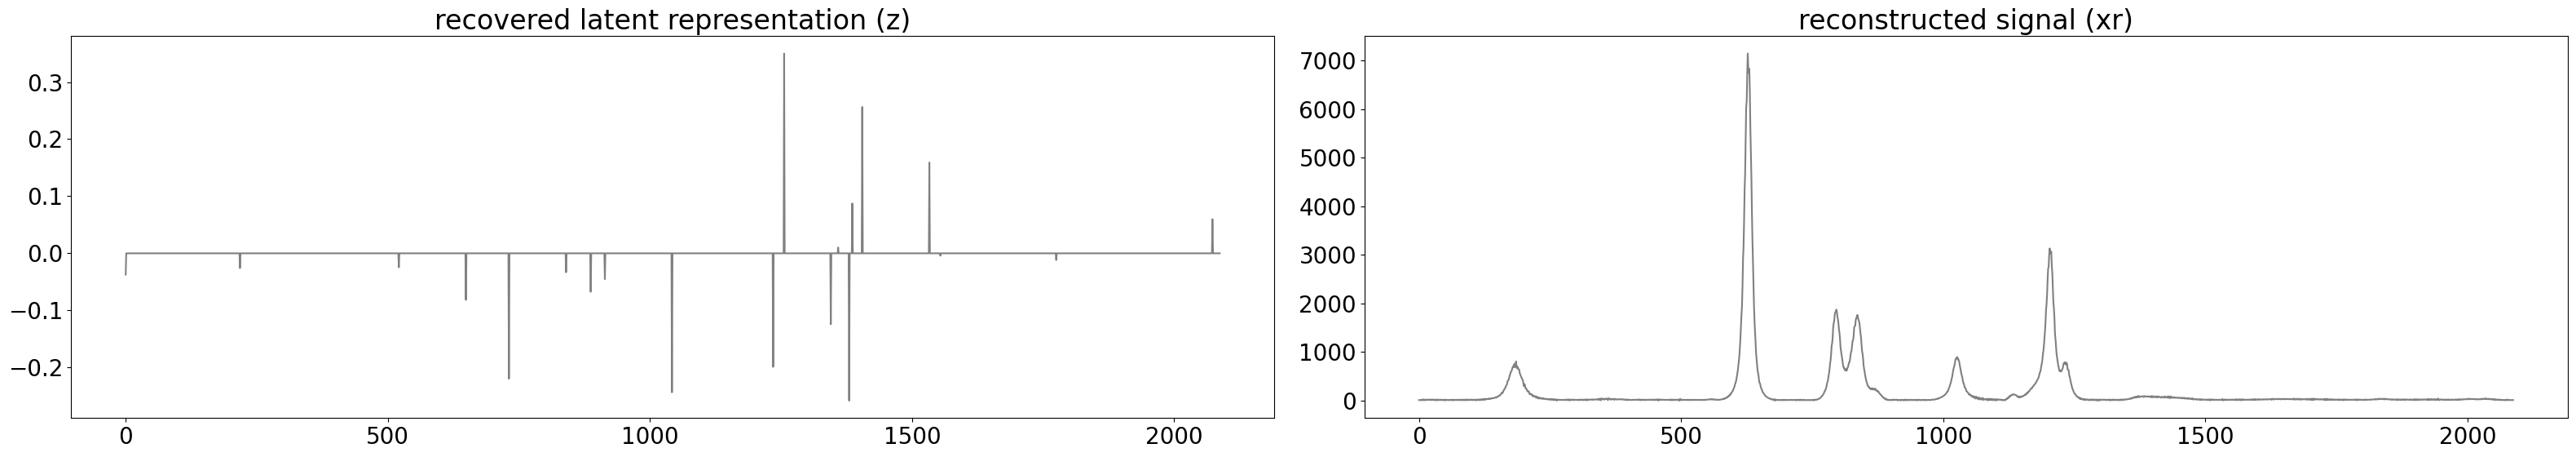


hyper-parameters:  (0.02, 'IDM', 'LASSO', 0.1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:02<00:00, 46.31it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.02, 'IDM', 'LASSO', 1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:12<00:00,  9.60it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.02, 'IDM', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:13<00:00,  9.27it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.02, 'IDM', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:04<00:00, 28.63it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.02, 'IDM', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:05<00:00, 24.00it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.02, 'DCT', 'LASSO', 0.1)


100%|███████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 352.22it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.02, 'DCT', 'LASSO', 1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:29<00:00,  4.08it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.02, 'DCT', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:33<00:00,  3.62it/s]


ACC =  0.5371900826446281

hyper-parameters:  (0.02, 'DCT', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:02<00:00, 60.13it/s]


ACC =  0.5537190082644629

hyper-parameters:  (0.02, 'DCT', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:20<00:00,  5.89it/s]


ACC =  0.628099173553719

hyper-parameters:  (0.02, 'DFT', 'LASSO', 0.1)


100%|███████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 131.58it/s]


ACC =  0.5537190082644629

hyper-parameters:  (0.02, 'DFT', 'LASSO', 1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:20<00:00,  5.85it/s]


ACC =  0.6033057851239669

hyper-parameters:  (0.02, 'DFT', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:18<00:00,  6.39it/s]


ACC =  0.6198347107438017

hyper-parameters:  (0.02, 'DFT', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 65.50it/s]


ACC =  0.5289256198347108

hyper-parameters:  (0.02, 'DFT', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:17<00:00,  6.84it/s]


ACC =  0.8264462809917356
Update best hparams. Acc improved from 0.6859504132231405 to 0.8264462809917356


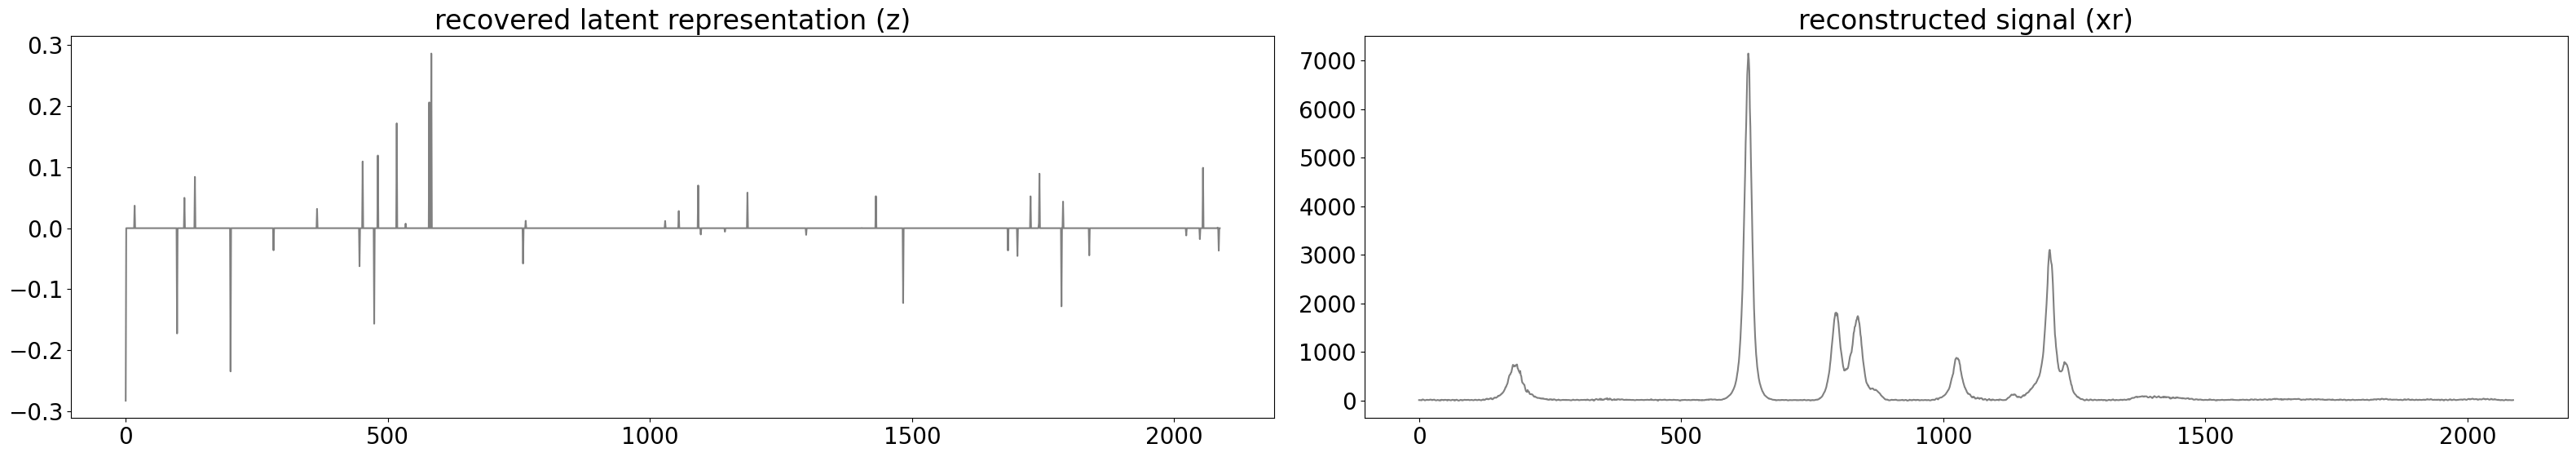


hyper-parameters:  (0.05, 'IDM', 'LASSO', 0.1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:10<00:00, 11.19it/s]


ACC =  0.768595041322314

hyper-parameters:  (0.05, 'IDM', 'LASSO', 1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:39<00:00,  3.10it/s]


ACC =  0.8016528925619835

hyper-parameters:  (0.05, 'IDM', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:38<00:00,  3.10it/s]


ACC =  0.8099173553719008

hyper-parameters:  (0.05, 'IDM', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:15<00:00,  7.81it/s]


ACC =  0.7520661157024794

hyper-parameters:  (0.05, 'IDM', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:12<00:00,  9.79it/s]


ACC =  0.7107438016528925

hyper-parameters:  (0.05, 'DCT', 'LASSO', 0.1)


100%|███████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 125.48it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.05, 'DCT', 'LASSO', 1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:53<00:00,  2.26it/s]


ACC =  0.5619834710743802

hyper-parameters:  (0.05, 'DCT', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:54<00:00,  2.21it/s]


ACC =  0.5371900826446281

hyper-parameters:  (0.05, 'DCT', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:05<00:00, 20.65it/s]


ACC =  0.6776859504132231

hyper-parameters:  (0.05, 'DCT', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:59<00:00,  2.04it/s]


ACC =  0.9421487603305785
Update best hparams. Acc improved from 0.8264462809917356 to 0.9421487603305785


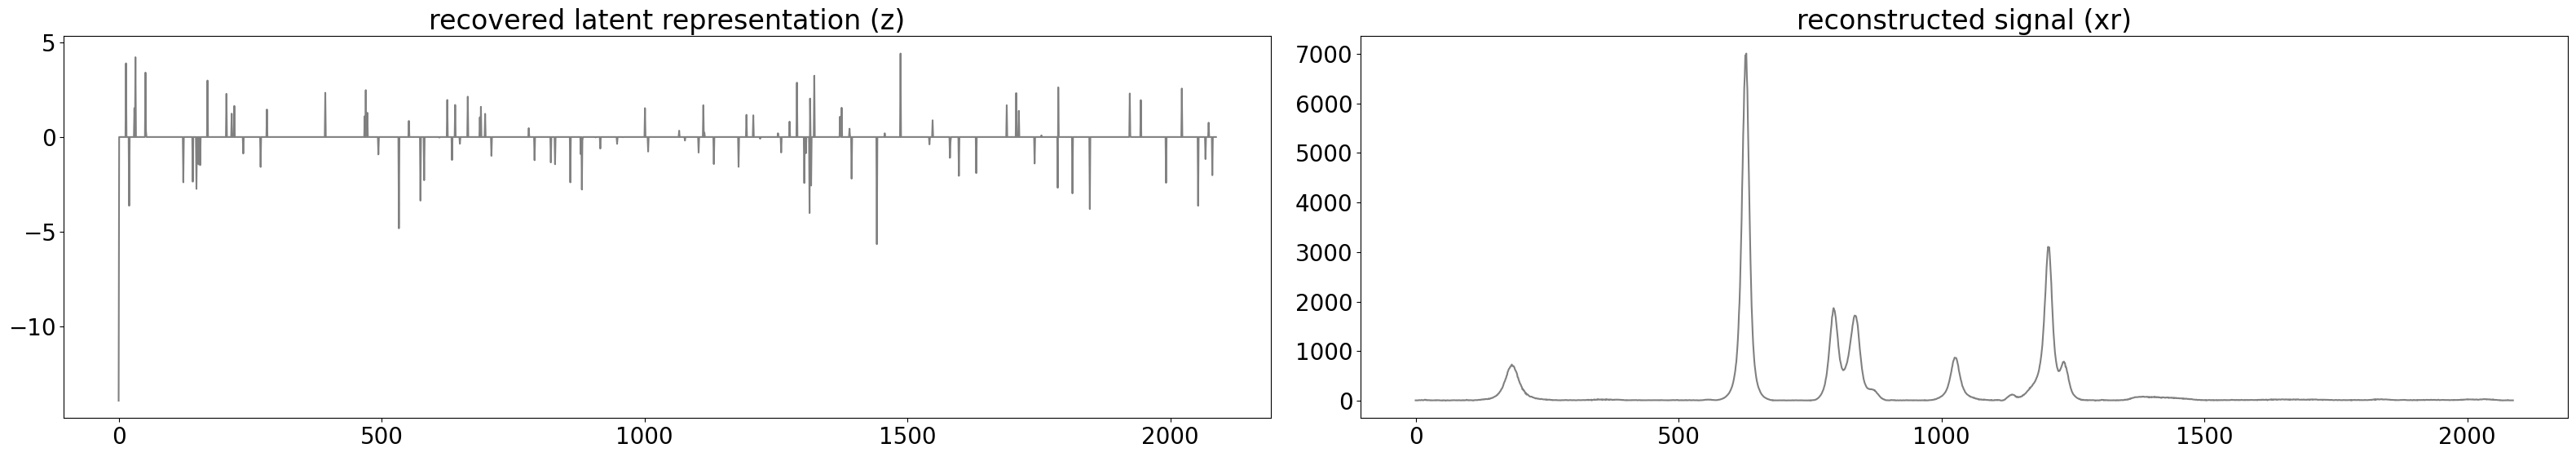


hyper-parameters:  (0.05, 'DFT', 'LASSO', 0.1)


100%|███████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 118.30it/s]


ACC =  0.71900826446281

hyper-parameters:  (0.05, 'DFT', 'LASSO', 1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:26<00:00,  4.50it/s]


ACC =  0.8347107438016529

hyper-parameters:  (0.05, 'DFT', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:26<00:00,  4.56it/s]


ACC =  0.8512396694214877

hyper-parameters:  (0.05, 'DFT', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:05<00:00, 21.76it/s]


ACC =  0.6694214876033058

hyper-parameters:  (0.05, 'DFT', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [01:06<00:00,  1.83it/s]


ACC =  0.9834710743801653
Update best hparams. Acc improved from 0.9421487603305785 to 0.9834710743801653


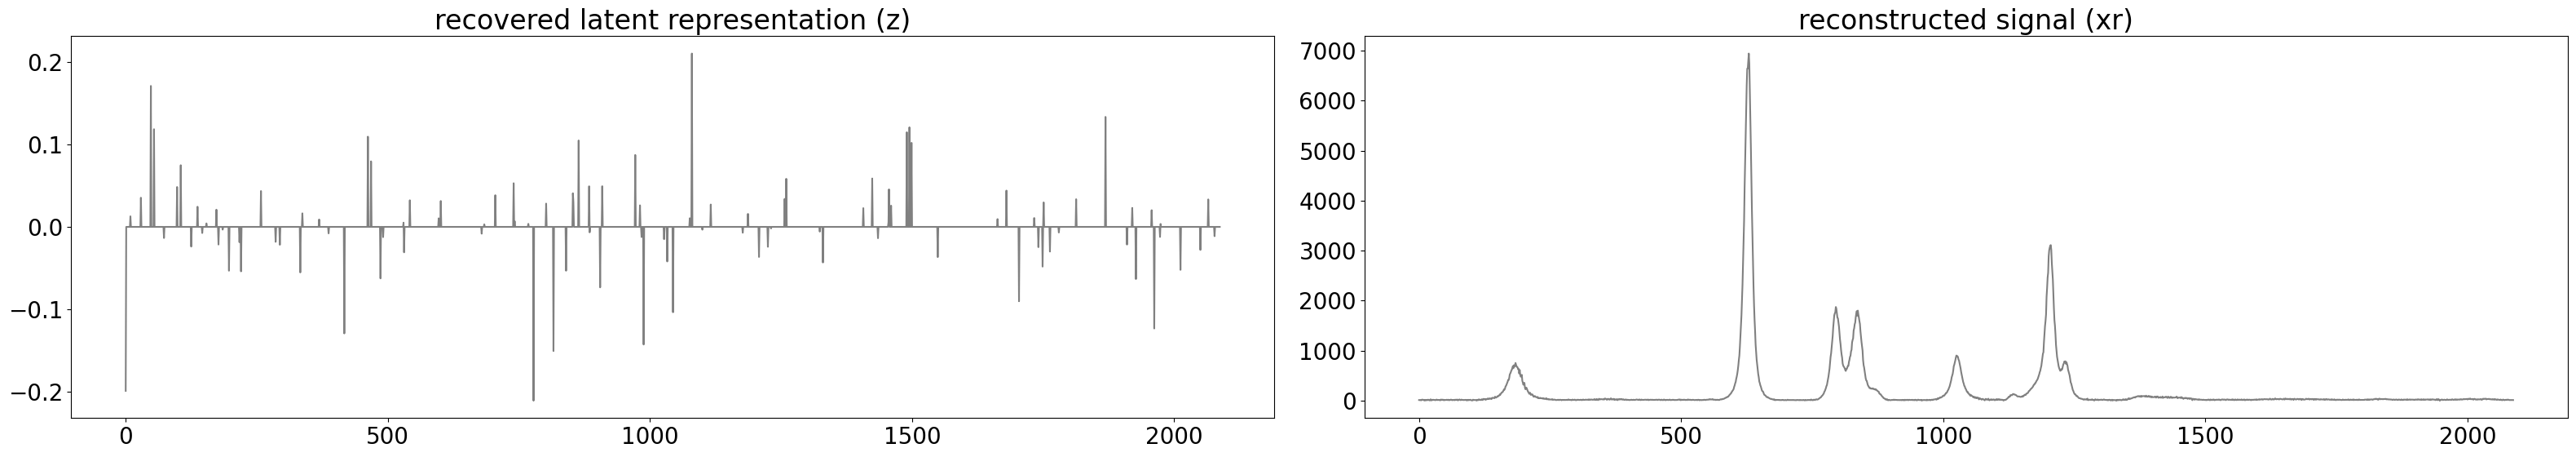


hyper-parameters:  (0.1, 'IDM', 'LASSO', 0.1)


100%|█████████████████████████████████████████████████████████████████████████████| 121/121 [8:17:58<00:00, 246.93s/it]


ACC =  1.0
Update best hparams. Acc improved from 0.9834710743801653 to 1.0


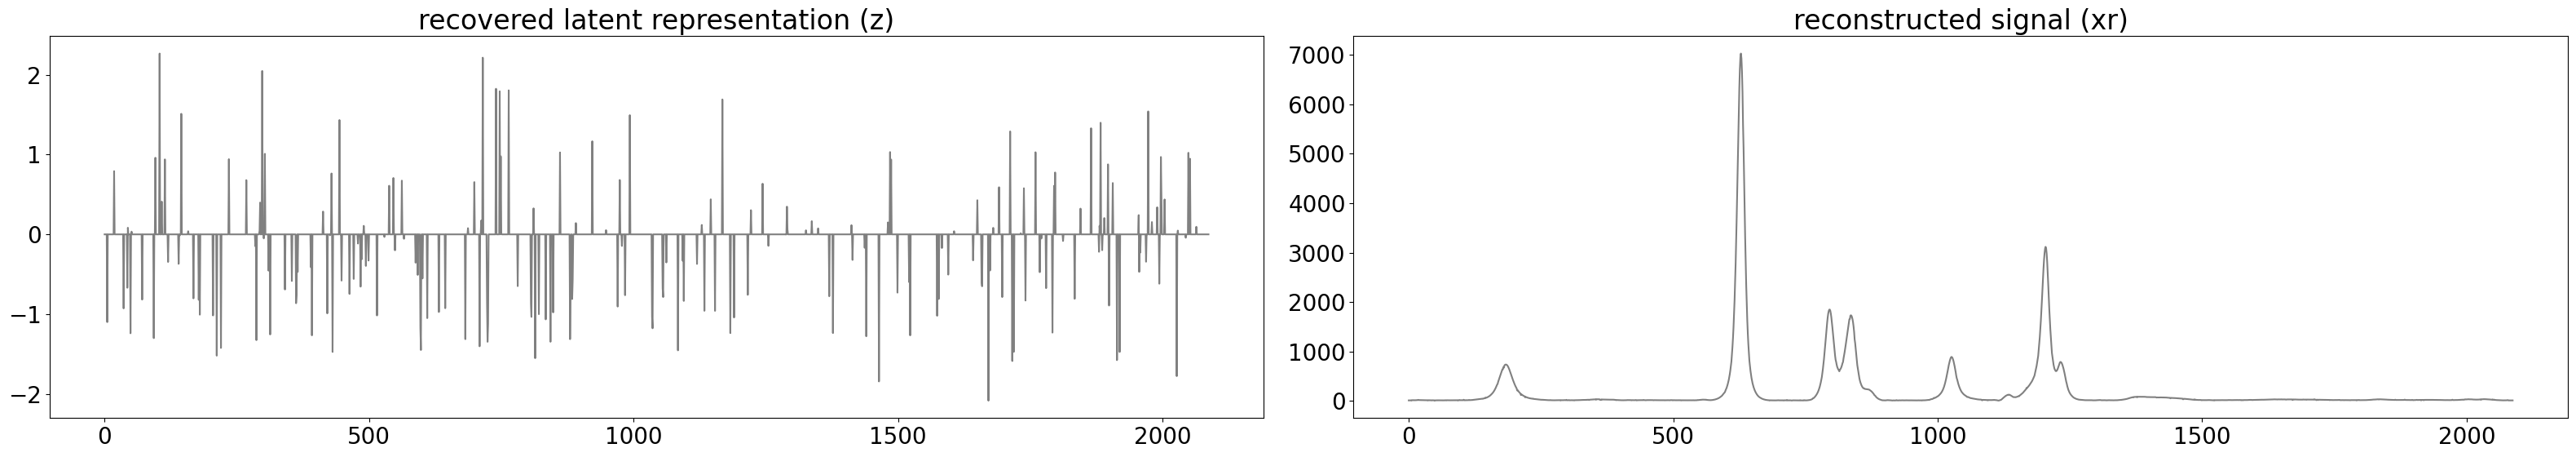


hyper-parameters:  (0.1, 'IDM', 'LASSO', 1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [01:20<00:00,  1.50it/s]


ACC =  1.0

hyper-parameters:  (0.1, 'IDM', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [01:20<00:00,  1.50it/s]


ACC =  1.0

hyper-parameters:  (0.1, 'IDM', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:40<00:00,  2.97it/s]


ACC =  1.0

hyper-parameters:  (0.1, 'IDM', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:27<00:00,  4.34it/s]


ACC =  1.0

hyper-parameters:  (0.1, 'DCT', 'LASSO', 0.1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 65.04it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.1, 'DCT', 'LASSO', 1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [01:41<00:00,  1.19it/s]


ACC =  0.628099173553719

hyper-parameters:  (0.1, 'DCT', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [01:41<00:00,  1.20it/s]


ACC =  0.6115702479338843

hyper-parameters:  (0.1, 'DCT', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:18<00:00,  6.40it/s]


ACC =  0.8677685950413223

hyper-parameters:  (0.1, 'DCT', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [02:54<00:00,  1.45s/it]


ACC =  1.0

hyper-parameters:  (0.1, 'DFT', 'LASSO', 0.1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 64.56it/s]


ACC =  0.859504132231405

hyper-parameters:  (0.1, 'DFT', 'LASSO', 1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:35<00:00,  3.40it/s]


ACC =  0.9752066115702479

hyper-parameters:  (0.1, 'DFT', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:37<00:00,  3.23it/s]


ACC =  0.9917355371900827

hyper-parameters:  (0.1, 'DFT', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:16<00:00,  7.31it/s]


ACC =  0.8760330578512396

hyper-parameters:  (0.1, 'DFT', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [03:03<00:00,  1.52s/it]


ACC =  1.0

hyper-parameters:  (0.3, 'IDM', 'LASSO', 0.1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [02:42<00:00,  1.34s/it]


ACC =  1.0

hyper-parameters:  (0.3, 'IDM', 'LASSO', 1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [04:55<00:00,  2.44s/it]


ACC =  1.0

hyper-parameters:  (0.3, 'IDM', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [04:58<00:00,  2.47s/it]


ACC =  1.0

hyper-parameters:  (0.3, 'IDM', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [02:10<00:00,  1.08s/it]


ACC =  1.0

hyper-parameters:  (0.3, 'IDM', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [02:01<00:00,  1.00s/it]


ACC =  1.0

hyper-parameters:  (0.3, 'DCT', 'LASSO', 0.1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:05<00:00, 22.17it/s]


ACC =  0.512396694214876

hyper-parameters:  (0.3, 'DCT', 'LASSO', 1)


100%|█████████████████████████████████████████████████████████████████████████████| 121/121 [6:14:02<00:00, 185.47s/it]


ACC =  0.9752066115702479

hyper-parameters:  (0.3, 'DCT', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [07:43<00:00,  3.83s/it]


ACC =  0.9421487603305785

hyper-parameters:  (0.3, 'DCT', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:31<00:00,  3.80it/s]


ACC =  1.0

hyper-parameters:  (0.3, 'DCT', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [32:46<00:00, 16.25s/it]


ACC =  1.0

hyper-parameters:  (0.3, 'DFT', 'LASSO', 0.1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:06<00:00, 18.36it/s]


ACC =  0.8677685950413223

hyper-parameters:  (0.3, 'DFT', 'LASSO', 1)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [01:23<00:00,  1.45it/s]


ACC =  1.0

hyper-parameters:  (0.3, 'DFT', 'LASSO', 10)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [01:20<00:00,  1.51it/s]


ACC =  1.0

hyper-parameters:  (0.3, 'DFT', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:31<00:00,  3.89it/s]


ACC =  1.0

hyper-parameters:  (0.3, 'DFT', 'BP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [35:06<00:00, 17.41s/it]

ACC =  1.0


({"(0.01, 'IDM', 'LASSO', 0.1)": 0.512396694214876,
  "(0.01, 'IDM', 'LASSO', 1)": 0.512396694214876,
  "(0.01, 'IDM', 'LASSO', 10)": 0.512396694214876,
  "(0.01, 'IDM', 'OMP', 0)": 0.512396694214876,
  "(0.01, 'IDM', 'BP', 0)": 0.512396694214876,
  "(0.01, 'DCT', 'LASSO', 0.1)": 0.512396694214876,
  "(0.01, 'DCT', 'LASSO', 1)": 0.512396694214876,
  "(0.01, 'DCT', 'LASSO', 10)": 0.5206611570247934,
  "(0.01, 'DCT', 'OMP', 0)": 0.5206611570247934,
  "(0.01, 'DCT', 'BP', 0)": 0.5371900826446281,
  "(0.01, 'DFT', 'LASSO', 0.1)": 0.5619834710743802,
  "(0.01, 'DFT', 'LASSO', 1)": 0.512396694214876,
  "(0.01, 'DFT', 'LASSO', 10)": 0.5206611570247934,
  "(0.01, 'DFT', 'OMP', 0)": 0.5537190082644629,
  "(0.01, 'DFT', 'BP', 0)": 0.6859504132231405,
  "(0.02, 'IDM', 'LASSO', 0.1)": 0.512396694214876,
  "(0.02, 'IDM', 'LASSO', 1)": 0.512396694214876,
  "(0.02, 'IDM', 'LASSO', 10)": 0.512396694214876,
  "(0.02, 'IDM', 'OMP', 0)": 0.512396694214876,
  "(0.02, 'IDM', 'BP', 0)": 0.512396694214876,
 

In [6]:
from qsi import io
from cs1 import cs

from qsi import io
X, y, X_names, desc, labels = io.load_dataset('vintage_526', display = False)

cs.GridSearch_Dataset_Sensing_n_Recovery(X, y, ts = ['IDM', 'DCT', 'DFT'], 
ks = [0.01, 0.02, 0.05, 0.1, 0.3], 
solvers = ['LASSO', 'OMP', 'BP'],
L1s = [0.1, 1, 10])

Non-adaptive transforms 'DCT/DFT/IDM' with eitherr of the 'LASSO/BP/OMP' solver can only reach ACC = 100% after k = 0.1, even IDM can reach 100%.

## Conclusion： 

To achieve the same level of classification accuracy, VAE only needs 1/10 sampling ratio of the non-adaptive CS.

Very impressive. **However**, one should not forget that the VAE was trained beforehand on a large relevant dataset, whereas basis pursuit works with **no prior knowledge of the data**.

*In this experiment, we didn't fix the random seed. The concrete run result may vary slightly each time due to randomness, but won't influence the general conclusion.*

<br/><br/><br/><hr/><br/><br/><br/><br/>

# Appendix

## Raman spectrometer

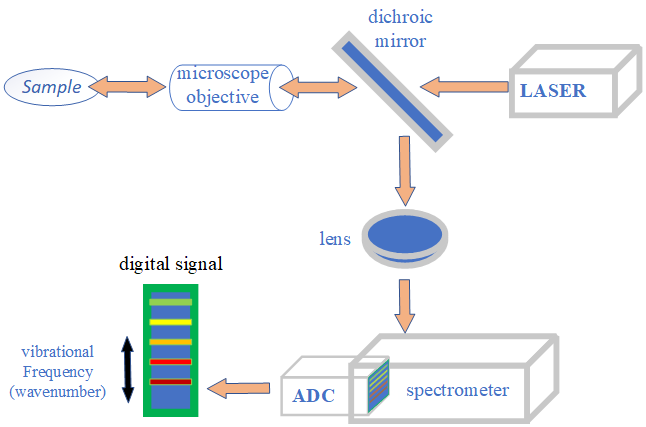

"
Schematic of Raman spectrometer. The displayed set-up focuses the illuminating laser (coloured green) down to a line on the sample (slit scanning mode), which can be replaced by a spot by removing the cylindrical lens. When a spot is illuminated at the sample, the Raman-shifted light (colored red) is filtered out from the laser light by a dichroic mirror, and dispersed along a vertical line on the two dimensional CCD detector. In slit-scanning mode, many spectra are acquired simultaneously: each position along the line on the sample produces a spectrum along the CCD detector.
"

## BP vs. BPDN/LASSO

Differences between BP and Lasso can be seen when consider the different formulation of the problems.  

Basis Pursuit: $ min∥x∥_1 , s.t.,  Ax=b  $

If you have some noise in your data,you can relax the constraint to some degree and reformulate it:   
$ min∥x∥_1 $, s.t., $ ∥Ax−b∥_2≤ϵ $  
This problem is called Basis Pursuit Denoising (BPDN). For BP, b must be in the column space of A i.e. $ Ax=b $. So, BPDN is noise tolarable version of BP.  


In order to achieve Lasso formulation, Exchange the constraint and the objective of BPDN and bring the sparsity level:
$ min∥Ax−b∥_2 $, $ s.t., min∥x∥_1 ≤ ϵ $, which is the Lagrangean dual of $ min ∥Ax−b∥^2_2 + λ ∥x∥_1 $.    
The above problem is called Lasso. 

Considering sparsity inducing nature of l1 norm, one can see from the formulation that Lasso is suitable for feature selection.
Also, there is another formulation of lasso.The l1 norm is convex, so you can relax the constraint and bring it into objective function by introducing lagrange multipliers.
$ min ∥Ax−b∥^2_2 + λ ∥x∥_1 $

### Summary: 

BP is not the same as Lasso. BP is a linear program.   
BPDN/Lasso are quadratic programs. Lasso and BPDN are equivalent problems.